In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../inputs/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
def courtesy(value):
    court = {
        r"Mrs.": "Mrs",
        r"Mr.": "Mr",
        r"Ms.": "Mrs",
        r"Miss.": "Miss",
        r"Master.": "Master",
        r"Dr.": "Dr",
        r"Rev.": "Rev",
        r"Col.": "Col"
    }
    for k,v in court.items():
        if re.search(k, value):
            return v
    else:
        return "Other"

In [11]:
df['Court'] = df.Name.apply(lambda x: courtesy(str(x)))

In [12]:
df.loc[df.Court=='Other']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Court
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Other
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,Other
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,Other
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,Other
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Other
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,Other
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,Other
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,Other


In [13]:
df.Court.value_counts(dropna=False)

Mr        518
Miss      180
Mrs       130
Master     40
Other       8
Dr          7
Rev         6
Col         2
Name: Court, dtype: int64

In [9]:
df.loc[df.Age.isna()].Court.value_counts()

Mr        136
Miss       36
Master      4
Dr          1
Name: Court, dtype: int64

In [22]:
df.loc[df.Court=="Mr"].Age.min()

11.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cb96a2f10>]],
      dtype=object)

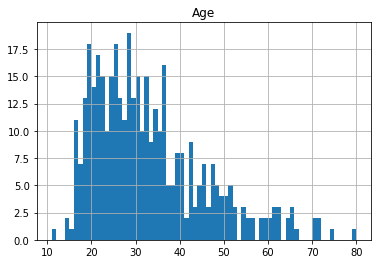

In [23]:
df.loc[df.Court=="Mr"].hist(column='Age', bins=80-11)